In [1]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.1 from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 61.1/61.1 kB 1.6 MB/s eta 0:00:00
     --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ae/f6/724d2d236797ea7479a5a7ec8e69c2bee60cad70273cf25078810415ae2d/fonttools-4.43.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- ----------------------------- 30.7/155.5 kB 660.6 kB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly

In [28]:
start = datetime(2000, 1, 1)
end = datetime(2023, 12, 31)

In [29]:
site1 = Point(40.65067617, -122.3220844, 202.96428)
site2 = Point(40.67945171, -122.3808775, 248.26369)

In [30]:
data = Monthly(site1, start, end)
data = data.normalize()
data = data.interpolate()
data = data.fetch()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2000-01-01 to 2023-12-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    287 non-null    float64
 1   tmin    287 non-null    float64
 2   tmax    287 non-null    float64
 3   prcp    287 non-null    float64
 4   wspd    287 non-null    float64
 5   pres    266 non-null    float64
 6   tsun    23 non-null     float64
dtypes: float64(7)
memory usage: 18.0 KB


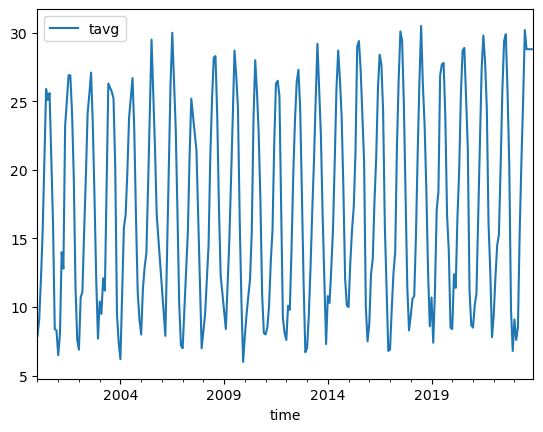

In [32]:
data.plot(y=['tavg'])
plt.show()

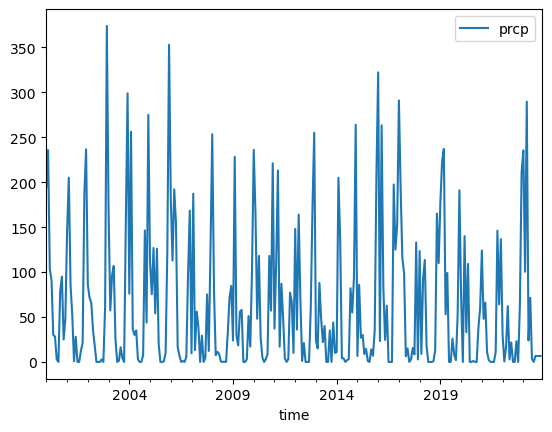

In [33]:
data.plot(y=['prcp'])
plt.show()

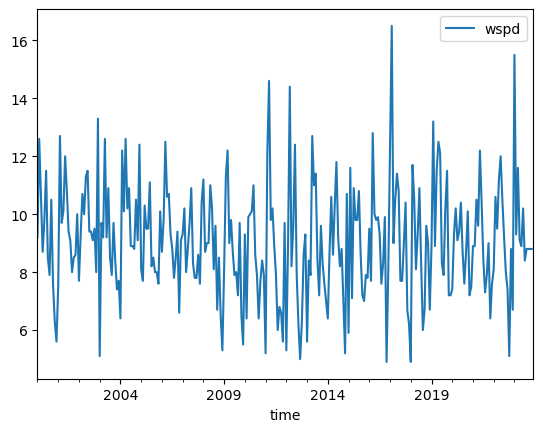

In [34]:
data.plot(y=['wspd'])
plt.show()

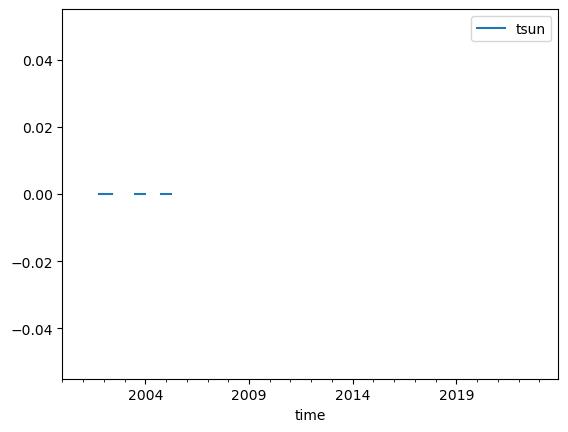

In [35]:
data.plot(y=['tsun'])
plt.show()

In [36]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import plotly.express as px

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [57]:
pd.DataFrame(data)

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2000-01-01,7.9,3.4,12.0,194.8,9.2,1017.6,NaN
2000-02-01,9.1,5.1,12.9,235.7,12.6,1017.6,NaN
2000-03-01,12.0,5.5,18.1,103.7,10.6,1017.6,NaN
2000-04-01,15.5,8.5,22.1,90.7,8.7,1015.4,NaN
2000-05-01,20.7,11.4,25.5,30.1,9.8,1013.2,NaN
...,...,...,...,...,...,...,...
2023-08-01,28.8,20.1,37.3,6.6,8.8,1010.9,NaN
2023-09-01,28.8,20.1,37.3,6.6,8.8,1010.9,NaN
2023-10-01,28.8,20.1,37.3,6.6,8.8,1010.9,NaN


In [58]:
site1_prcp = data

In [59]:
site1_prcp = data.set_index(pd.date_range('1-1-2000', periods = len(data), freq = 'M')).drop(['tmin','tmax','pres','wspd','tsun','tavg'], axis = 1)
site1_temp = data.set_index(pd.date_range('1-1-2000', periods = len(data), freq = 'M')).drop(['tmin','tmax','pres','wspd','tsun','prcp'], axis = 1)

In [60]:
site1_prcp.head()
site1_prcp.dropna(how='any')

,prcp
2000-01-31,194.8
2000-02-29,235.7
2000-03-31,103.7
2000-04-30,90.7
2000-05-31,30.1
...,...
2023-07-31,0.0
2023-08-31,6.6
2023-09-30,6.6
2023-10-31,6.6


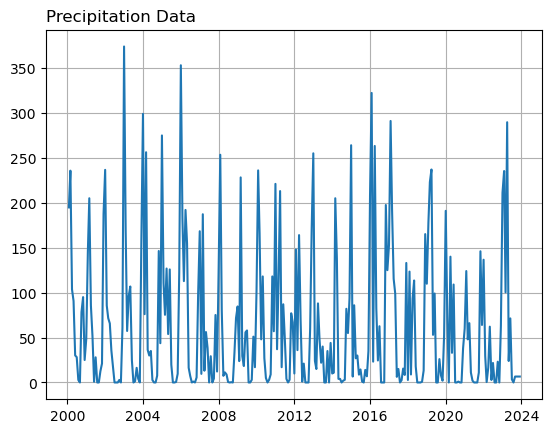

In [61]:
plt.plot(site1_prcp)
plt.title('Precipitation Data', loc = 'left')
plt.grid();

In [62]:
site1_temp.head()

,tavg
2000-01-31,7.9
2000-02-29,9.1
2000-03-31,12.0
2000-04-30,15.5
2000-05-31,20.7


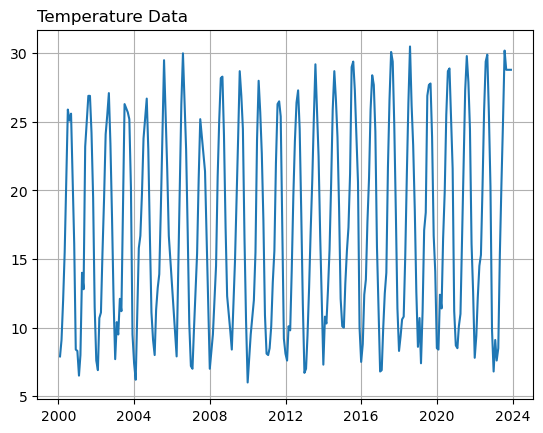

In [63]:
plt.plot(site1_temp)
plt.title('Temperature Data', loc = 'left')
plt.grid();

In [64]:
y_hist = site1_prcp[:'01-01-2015']
y_future = site1_prcp['01-01-2015':]

In [65]:
print('Historical:')
print(y_hist.tail())
print('=========\nFuture:')
print(y_future.head())

Historical:
             prcp
2014-08-31    3.0
2014-09-30   82.0
2014-10-31   55.0
2014-11-30   94.0
2014-12-31  264.0
Future:
            prcp
2015-01-31   6.6
2015-02-28  85.9
2015-03-31  26.9
2015-04-30  30.0
2015-05-31   8.7


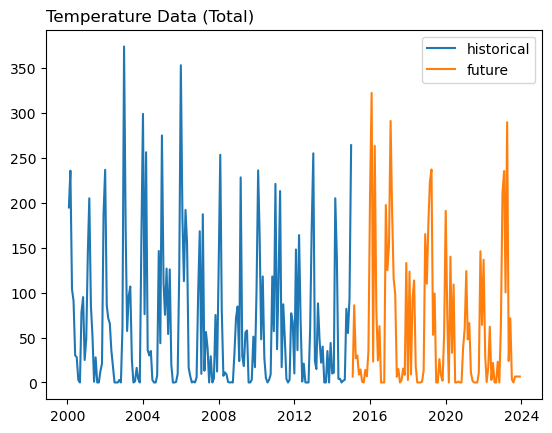

In [66]:
plt.plot(y_hist, label = 'historical')
plt.plot(y_future, label = 'future')
plt.title('Temperature Data (Total)', loc = 'left')
plt.legend();

In [67]:
stl = STL(y_hist, period = 12)
results = stl.fit()

ValueError: endog must have ndim <= 1

In [68]:
plt.plot(results.trend)
plt.plot(y_hist)
plt.title('Trend with Precipitation Data', loc = 'left')

NameError: name 'results' is not defined

In [51]:
season_and_trend = results.seasonal + results.trend

NameError: name 'results' is not defined

In [52]:
plt.plot(season_and_trend['2012':], label = 'seasonal + trend')
plt.plot(y_hist['2012':], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

NameError: name 'season_and_trend' is not defined

In [53]:
plt.plot(results.resid)
plt.grid()
plt.title('Stationary Residue (Results Method)');

NameError: name 'results' is not defined

In [54]:
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))

ValueError: endog must have ndim <= 1

In [28]:
stl = STL(site1_prcp)
results = stl.fit()

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result = 'yes' if adfuller(results.resid)[1] < 0.05 else 'no'
result

MissingDataError: exog contains inf or nans

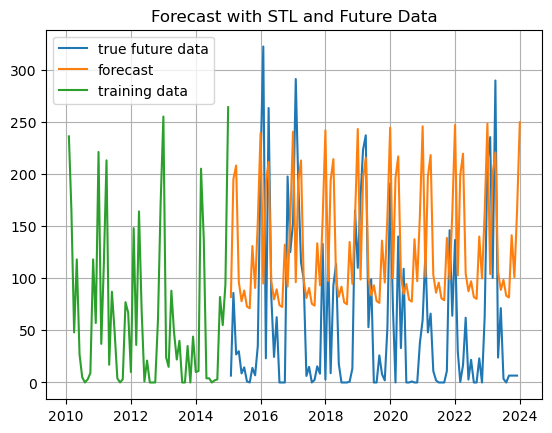

In [31]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist['2010':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [32]:
pred_error = y_future - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())

In [33]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 2015-01-31 00:00:00   NaN
2015-02-28 00:00:00   NaN
2015-03-31 00:00:00   NaN
2015-04-30 00:00:00   NaN
2015-05-31 00:00:00   NaN
                       ..
2023-09-30 00:00:00   NaN
2023-10-31 00:00:00   NaN
2023-11-30 00:00:00   NaN
2023-12-31 00:00:00   NaN
prcp                  NaN
Length: 109, dtype: float64
RMSE: 2015-01-31 00:00:00   NaN
2015-02-28 00:00:00   NaN
2015-03-31 00:00:00   NaN
2015-04-30 00:00:00   NaN
2015-05-31 00:00:00   NaN
                       ..
2023-09-30 00:00:00   NaN
2023-10-31 00:00:00   NaN
2023-11-30 00:00:00   NaN
2023-12-31 00:00:00   NaN
prcp                  NaN
Length: 109, dtype: float64


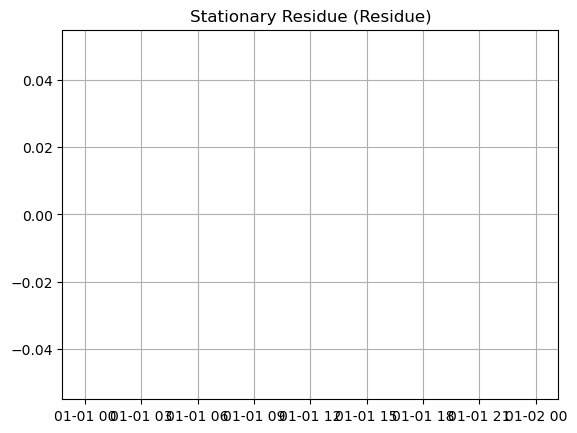

In [34]:
residue = y_hist - season_and_trend
plt.plot(residue)
plt.grid()
plt.title('Stationary Residue (Residue)');